In [51]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
#import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [168]:
path = "H:\Local Disk\Local Disk E_32420212115\DATA-MINING\(2021) Lab07 - DM\\"

In [228]:
data= pd.read_csv(path + "bank-full.csv", sep=';')

In [171]:
#Creating User Columns
data_user = pd.DataFrame(np.arange(0,len(data)), columns=['user'])
data = pd.concat([data_user, data], axis=1)
data.head(10)

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [172]:
data.describe()

,user,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [173]:
data.groupby('y').mean()

,user,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [174]:
data.shape

(45211, 18)

In [175]:
data.isnull().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [176]:
#Define X and y
X = data.drop(['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = data['y']

In [177]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [178]:
#Get Dummies Values
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [179]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

## Visualizing the Data

no     39922
yes     5289
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

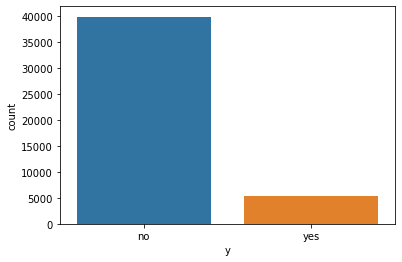

In [180]:
print(data['y'].value_counts())
sns.countplot(x='y', data=data)

Đây là độ chính xác của tập dữ liệu mất cân bằng cao không thể hoạt động tốt với dữ liệu mất cân bằng 

### Job

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


<AxesSubplot:xlabel='count', ylabel='job'>

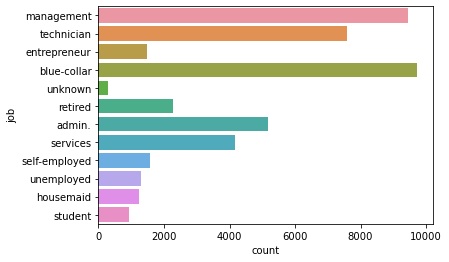

In [149]:
print(data.job.value_counts())
sns.countplot(y='job', data=data)

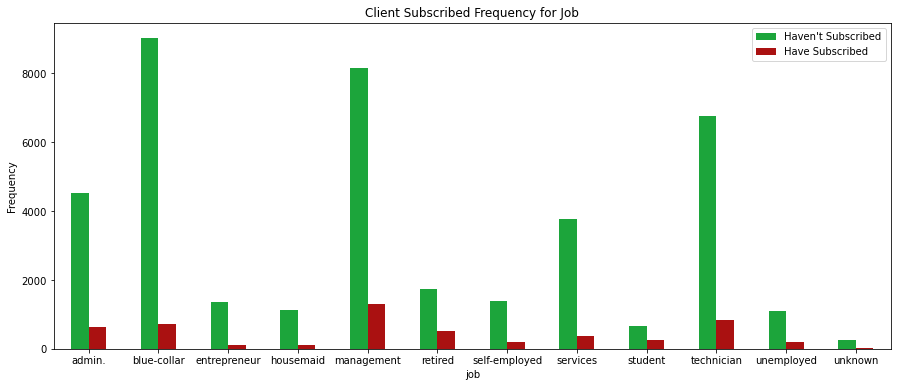

In [189]:
pd.crosstab(data.job,data.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Job')
plt.xlabel('job')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

### Material

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


<AxesSubplot:xlabel='marital', ylabel='count'>

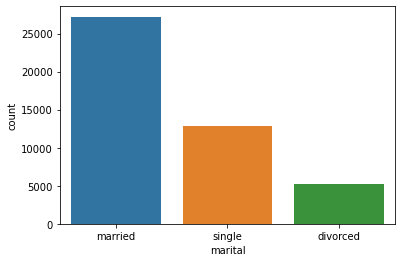

In [150]:
print(data.marital.value_counts())
sns.countplot(x='marital', data=data)

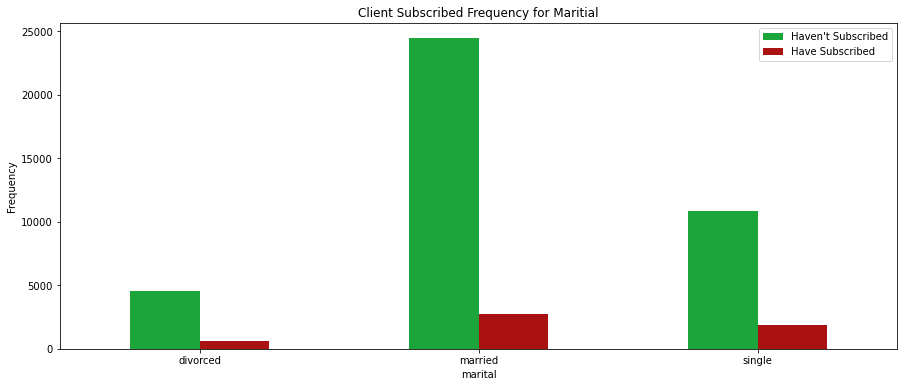

In [185]:
pd.crosstab(data.marital,data.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

### Education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


<AxesSubplot:xlabel='education', ylabel='count'>

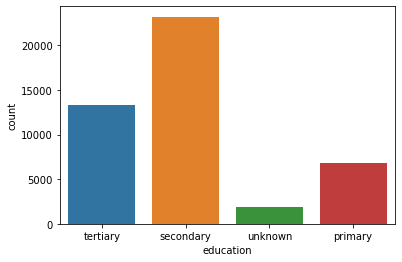

In [151]:
print(data.education.value_counts())
sns.countplot(x='education', data=data)

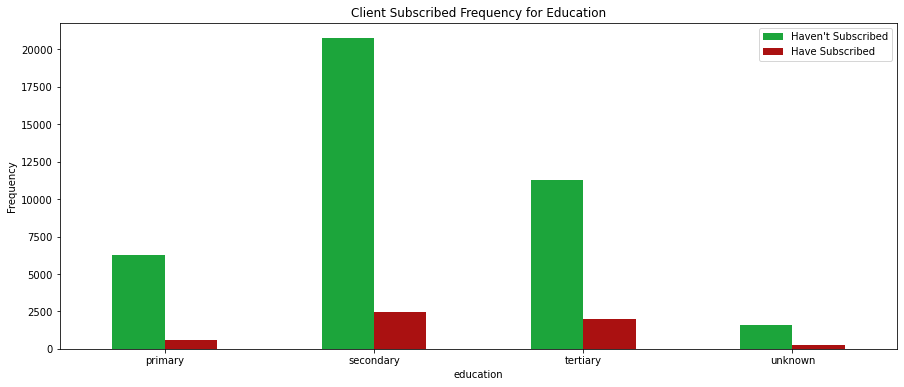

In [188]:
pd.crosstab(data.education,data.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Education')
plt.xlabel('education')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

### Age

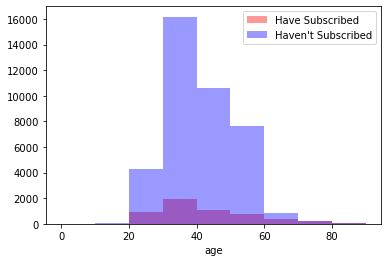

In [181]:
#Age group
bins = range(0, 100, 10)
ax = sns.distplot(data.age[data.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(data.age[data.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

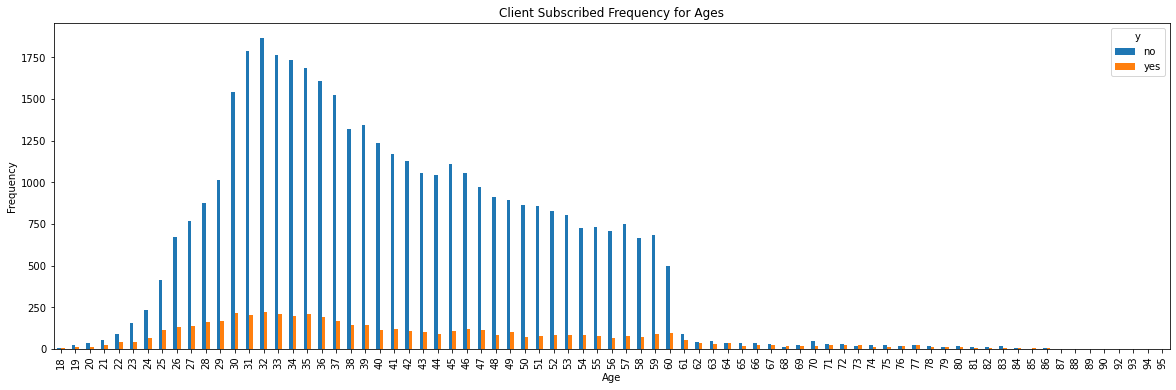

In [183]:
#Age
pd.crosstab(data.age,data.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Building Models and Comparing Models

In [257]:
data.drop(['user','duration','contact','month','default','pdays',],axis=1,inplace=True)
data.head(5)

,age,job,marital,education,balance,housing,loan,day,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,5,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,5,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,5,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,5,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,5,1,0,unknown,no


In [258]:
y_valus ={'yes' : 1, 'no' : 0}
data['y'] = data['y'].map(lambda x: y_valus[x])
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [259]:
y = data['y']

In [260]:
data.drop(['y'], axis = 1, inplace = True)
data.head()

,age,job,marital,education,balance,housing,loan,day,campaign,previous,poutcome
0,58,management,married,tertiary,2143,yes,no,5,1,0,unknown
1,44,technician,single,secondary,29,yes,no,5,1,0,unknown
2,33,entrepreneur,married,secondary,2,yes,yes,5,1,0,unknown
3,47,blue-collar,married,unknown,1506,yes,no,5,1,0,unknown
4,33,unknown,single,unknown,1,no,no,5,1,0,unknown


In [261]:
#splitting the data 
x_train, le_x_test, y_train, le_y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
le_x_train, le_x_cv, le_y_train, le_y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [262]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(le_x_train.shape,le_x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(le_y_train.shape,le_y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(le_x_cv.shape,le_y_cv.shape))

the shape of x_train data,(28934, 11) and shape of x_test data (9043, 11):
the shape of y_train data,(28934,) and shape of y_test data (9043,):
the shape of x_cv data,(7234, 11) and shape of y_cv data (7234,):


## Feature Encoding

In [263]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data['job'])
le_x_train.job = le.transform(le_x_train.job)
le_x_test.job = le.transform(le_x_test.job)
le_x_cv.job = le.transform(le_x_cv.job)

le.fit(data['marital'])
le_x_train.marital = le.transform(le_x_train.marital)
le_x_test.marital = le.transform(le_x_test.marital)
le_x_cv.marital = le.transform(le_x_cv.marital)

le.fit(data['education'])
le_x_train.education = le.transform(le_x_train.education)
le_x_test.education = le.transform(le_x_test.education)
le_x_cv.education = le.transform(le_x_cv.education)

le.fit(data['housing'])
le_x_train.housing = le.transform(le_x_train.housing)
le_x_test.housing = le.transform(le_x_test.housing)
le_x_cv.housing = le.transform(le_x_cv.housing)

le.fit(data['loan'])
le_x_train.loan = le.transform(le_x_train.loan)
le_x_test.loan = le.transform(le_x_test.loan)
le_x_cv.loan = le.transform(le_x_cv.loan)

le.fit(data['poutcome'])
le_x_train.poutcome = le.transform(le_x_train.poutcome)
le_x_test.poutcome = le.transform(le_x_test.poutcome)
le_x_cv.poutcome = le.transform(le_x_cv.poutcome)

In [264]:
# Label Encode all labels
le_x_train = le_x_train.apply(LabelEncoder().fit_transform)

In [265]:
le_x_train.head()

,age,job,marital,education,balance,housing,loan,day,campaign,previous,poutcome
15408,15,4,2,1,706,1,0,17,0,0,3
19709,14,4,2,2,1103,0,0,6,2,0,3
31178,32,4,1,3,5452,0,0,26,0,1,0
24097,39,9,1,1,5319,0,0,27,0,0,3
32899,13,7,2,1,791,1,0,16,1,0,3


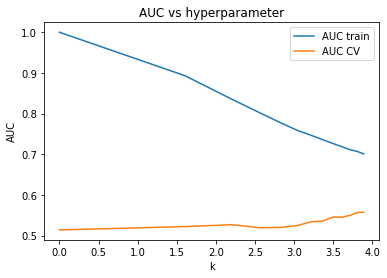

optimal alpha for which auc is maximum :  49


In [266]:
#Applying KNN Brute Force Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

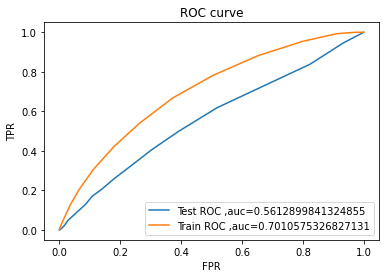

AUC on Test data is 0.5612899841324855
AUC on Train data is 0.7010575326827131
---------------------------


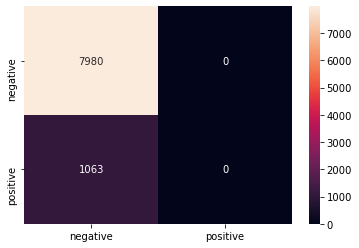

In [267]:
from sklearn.metrics import confusion_matrix
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [268]:
results=pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
new = ['KNN with Brute force','KNeighborsClassifier',"k = 37",0.8288,0.7587]
results.loc[0] = new

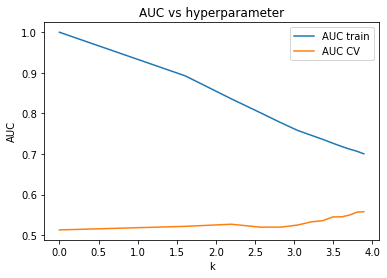

optimal alpha for which auc is maximum :  49


In [269]:
#Applying KNN kd-Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='kd_tree')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

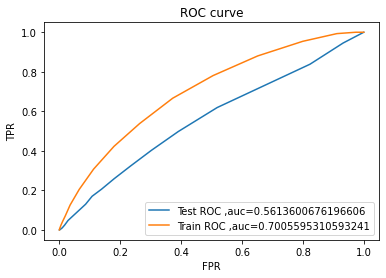

AUC on Test data is 0.5613600676196606
AUC on Train data is 0.7005595310593241
---------------------------


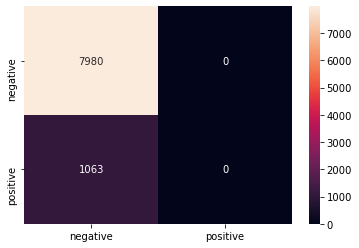

In [270]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


In [271]:
new = ['KNN with kd-tree','KNeighborsClassifier',"k = 33",0.8322,0.7573]
results.loc[1] = new

In [273]:
#Top 5 important features of subscribed class
all_features = x_train.columns
all_features

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'campaign', 'previous', 'poutcome'],
      dtype='object')

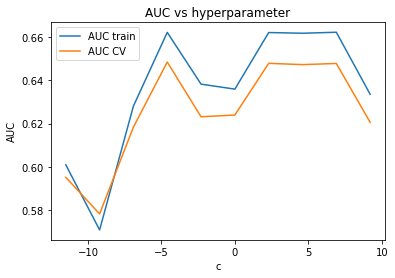

optimal c for which auc is maximum :  0.01


In [275]:
#Applying Logistic Regression with L2 regularization
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

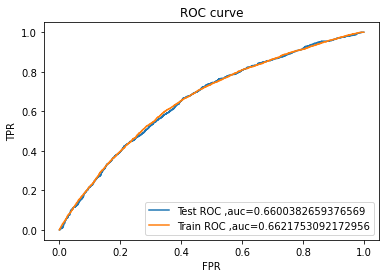

AUC on Test data is 0.6600382659376569
AUC on Train data is 0.6621753092172956
---------------------------


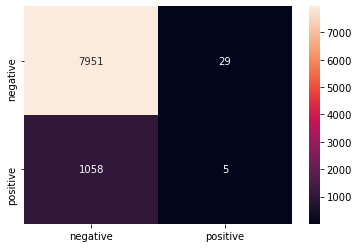

In [276]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [277]:
#Top 5 important features of subscribed class
all_features = x_train.columns

In [278]:
weight = clf.coef_
pos_indx = np.argsort(weight)[:,::-1]

neg_indx = np.argsort(weight)

print('Top 5 subscribed features :')
for i in list(pos_indx[0][0:5]):
    print(all_features[i])

Top 5 subscribed features :
previous
job
balance
education
day


In [279]:
print('Top 5 not subscribed features :')
for i in list(neg_indx[0][:5]):
    print(all_features[i])

Top 5 not subscribed features :
housing
poutcome
marital
loan
campaign


In [280]:
new = ['Logistic Regression with L2','LogisticRegression',"c = 10",0.7644,0.7595]
results.loc[3] = new

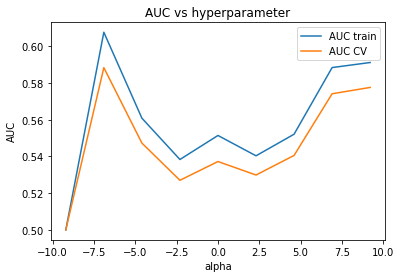

optimal alpha for which auc is maximum :  0.001


In [281]:
#Applying Linear SVM
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='AUC train')
x.plot(alpha, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

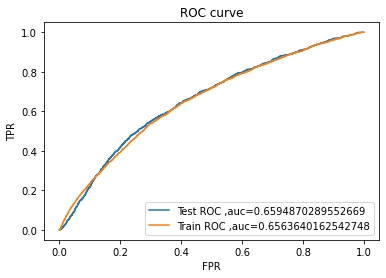

AUC on Test data is 0.6594870289552669
AUC on Train data is 0.6563640162542748
---------------------------


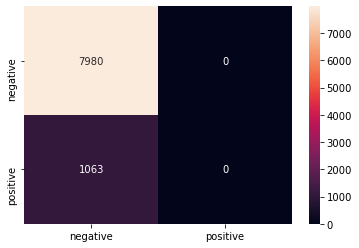

In [282]:
#Testing AUC on Test data
model = SGDClassifier(alpha = optimal_alpha)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [283]:
all_features = x_train.columns
clf = SGDClassifier(alpha=0.01)
clf.fit(le_x_train,le_y_train)
weight = clf.coef_
positive_index=np.argsort(weight)[:,::-1]

negative_index=np.argsort(weight)

print('Top 10 subscribed features :')
for i in list(positive_index[0][0:10]):
    print(all_features[i])
    
print("----------------")

#top 10 negative features
print('Top 10 not subscribed features :')
for i in list(negative_index[0][0:10]):
    print(all_features[i])

Top 10 subscribed features :
previous
education
job
marital
age
day
balance
loan
poutcome
housing
----------------
Top 10 not subscribed features :
campaign
housing
poutcome
loan
balance
day
age
marital
job
education


In [284]:
new = ['Linear SVM','SGDClassifier',"alpha = 0.01",0.7537,0.7434]
results.loc[4] = new

In [286]:
#Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 50


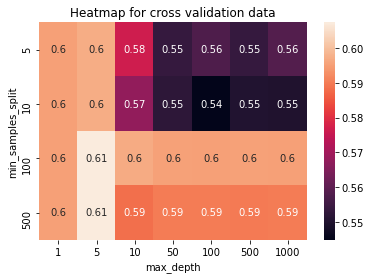

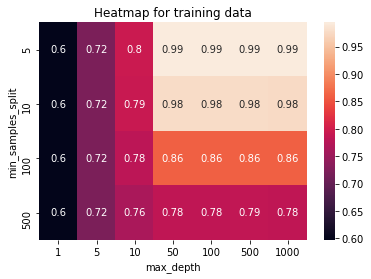

In [287]:
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

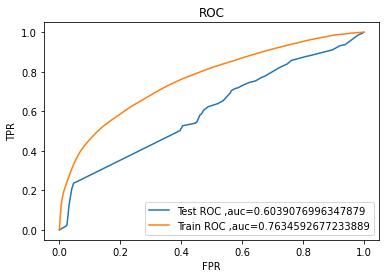

AUC on Test data is 0.6039076996347879
AUC on Train data is 0.7634592677233889
---------------------------


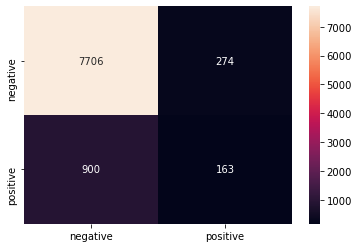

In [288]:
#training our model for max_depth=50,min_samples_split=500
clf = DecisionTreeClassifier(max_depth = 10,min_samples_split = 500)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [289]:
#Top important features
all_features = x_train.columns

feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    print(all_features[i])

poutcome
previous
age
housing
balance
day
campaign
loan
education
marital
job


In [290]:
new = ['Decision Tree','DecisionTreeClassifier',"max_depth = 10 & min_samples_split = 500",0.8131,0.7925]
results.loc[6] = new

In [291]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 100
optimal max_depth 10


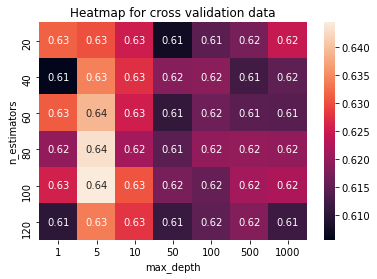

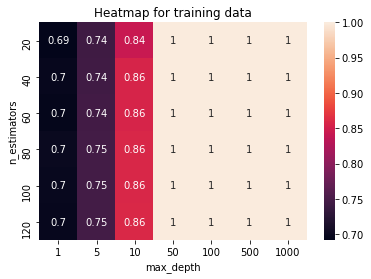

In [292]:
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()


In [293]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

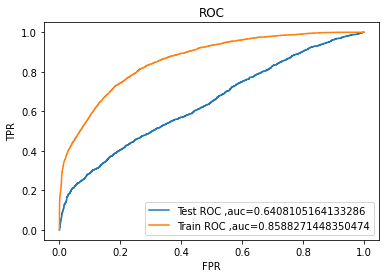

AUC on Test data is 0.6408105164133286
AUC on Train data is 0.8588271448350474
---------------------------


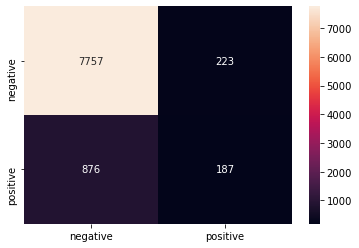

In [294]:
#training our model for max_depth=10,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [295]:
new = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 100",0.8650, 0.8035]
results.loc[7] = new

In [299]:
results

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 37,0.8288,0.7587
1,KNN with kd-tree,KNeighborsClassifier,k = 33,0.8322,0.7573
3,Logistic Regression with L2,LogisticRegression,c = 10,0.7644,0.7595
4,Linear SVM,SGDClassifier,alpha = 0.01,0.7537,0.7434
6,Decision Tree,DecisionTreeClassifier,max_depth = 10 & min_samples_split = 500,0.8131,0.7925
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 100,0.8650,0.8035
